In [1]:
%load_ext autoreload
%autoreload 2
import pkg.GradientDescent as gd

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
train_df, test_df = train_test_split(df, test_size=0.8, random_state=123)
train_df.head()

,age,sex,bmi,children,smoker,region,charges
1226,38,male,16.815,2,no,northeast,6640.54485
640,33,male,42.400,5,no,southwest,6666.24300
625,29,female,26.030,0,no,northwest,3736.46470
14,27,male,42.130,0,yes,southeast,39611.75770
165,47,male,28.215,4,no,northeast,10407.08585


In [5]:
x_cols = ["age", "sex", "bmi", "children", "smoker", "region"]
y_col = "charges"

x_train = train_df[x_cols]
y_train = train_df[y_col]

x_test = train_df[x_cols]
y_test = train_df[y_col]

In [6]:
x_train.describe(include="all")

,age,sex,bmi,children,smoker,region
count,267.000000,267,267.000000,267.000000,267,267
unique,NaN,2,NaN,NaN,2,4
top,NaN,male,NaN,NaN,no,southeast
freq,NaN,136,NaN,NaN,205,72
mean,38.183521,NaN,30.672004,1.059925,NaN,NaN
std,14.106204,NaN,6.267790,1.209364,NaN,NaN
min,18.000000,NaN,16.815000,0.000000,NaN,NaN
25%,25.000000,NaN,26.405000,0.000000,NaN,NaN
50%,38.000000,NaN,29.920000,1.000000,NaN,NaN
75%,50.000000,NaN,34.817500,2.000000,NaN,NaN


In [7]:
model = gd.RegressionGD(x_train, y_train, 100000)
model.gradient_descent()

Iteration     0: Cost 79531770.71569847
Iteration 10000: Cost 20484770.88359304
Iteration 20000: Cost 20484762.98764916
Iteration 30000: Cost 20484762.987378266
Convergence at iteration 35431
Final value of w is age                  3569.232308
bmi                  2267.102904
children              295.695052
sex_male              309.015605
smoker_yes          23203.170571
region_northwest      561.401254
region_southeast     -229.158757
region_southwest     -327.330387
dtype: float64 and b is 8228.461982154862


In [15]:
y_hat = model.predict(x_test)

In [9]:
residual = y_hat - y_test
residual.mean()

7.920348440159168e-07

<function matplotlib.pyplot.show(close=None, block=None)>

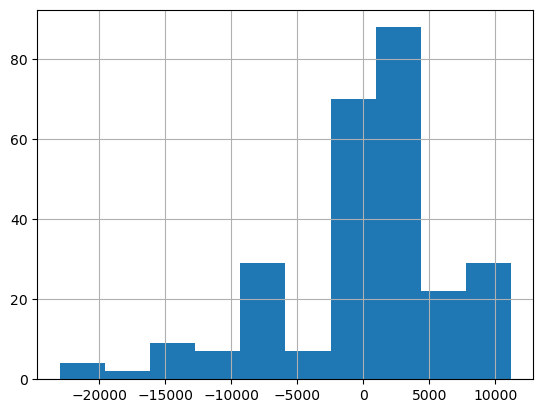

In [10]:
import matplotlib.pyplot as plt
residual.hist()
plt.show

In [11]:

bob = pd.DataFrame({
    'age': [19],
    'bmi': [27.9],
    'children': [0],
    'sex': 'male',
    'smoker': 'yes',
    'region': 'northwest'
})

lisa = pd.DataFrame({
    'age': [40],
    'bmi': [50],
    'children': [2],
    'sex': 'female',
    'smoker': 'no',
    'region': 'southwest',
})

john = pd.DataFrame({
    'age': [30],
    'bmi': [31.2],
    'children': [0],
    'sex': 'female',
    'smoker': 'no',
    'region': 'northeast',
})

,age,bmi,children,sex,smoker,region
0,19,27.9,0,male,yes,northwest


In [13]:
model.predict(bob)

/Users/kianmohajeri/HealthCareCost/Health-Care-Cost-Prediction-with-Linear-Regression-Models/src/pkg/GradientDescent.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.35993501]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.loc[:, numerical_cols] = normalized_data
/Users/kianmohajeri/HealthCareCost/Health-Care-Cost-Prediction-with-Linear-Regression-Models/src/pkg/GradientDescent.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.87643194]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.loc[:, numerical_cols] = normalized_data


0    26186.315911
dtype: float64